<a href="https://colab.research.google.com/github/annaliese-estes/eds-summerschool25/blob/main/Quantum_Masterclass_Answer_Key.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# EDS Summer School Qiskit Tutorial: Program a quantum computer from your laptop

Instructor:  
Annaliese Estes  

# Magic 8 Ball

Here, we will build a Magic 8 Ball program that randomly returns 1 of 8 possible responses. How do we use quantum computing to generate a random number? Computational space scales exponentially in quantum computing. Thus, if we need a random result out of 8 possibilities, our program needs to take a measurement of a quantum state vector that consists of 8 basis states, which represent the computational space of 3 qubits in an equal superposition.



In [1]:
# install Qiskit with visualization

!pip install qiskit[visualization]
!pip install qiskit-ibm-runtime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 4.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 38.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 92.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.0/109.0 kB 10.6 MB/s eta 0:00:00
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136817 sha256=2e86d3c034297719bd58254fdc335cae2067d4dd324f37bf3f6eaabb9947b4af
  Stored in directory: /root/.cache/pip/wheels/b1/7a/33/9fdd892f784ed4afda62b685ae3703adf4c91aa0f524c28f03
Successfully built pylatexenc
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 39.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 366.2/366.2 kB 29.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.8/75.8 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [2]:
# install additional packages

from qiskit import QuantumCircuit
from qiskit.visualization import plot_histogram
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit_ibm_runtime import SamplerV2 as Sampler
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
import math
import matplotlib.pyplot as plt

In [5]:
## Save your IBM Quantum account and set it as your default account.
QiskitRuntimeService.save_account(

    token="NwbDur4nYhPbYXxh0pAkuFmnQBmj5nVImmviBLH05qfg",

    instance="crn:v1:bluemix:public:quantum-computing:us-east:a/ef0da753252641ebaf9f116335edf1b9:13eb13c0-4351-49ea-ab25-3201ff1bdb30::", # Optionally specify the instance to use.

    set_as_default=True,

    # Use `overwrite=True` if you're updating your token.
    #overwrite=True,
)

# Load saved credentials
service = QiskitRuntimeService()

In [6]:
# define Magic 8 Ball responses

responses = ["Yes", "Not today", "Definitely", "Try again", "Signs point to yes", "Not likely", "Sure thing!", "Outlook not so good"]

## Qiskit Patterns: Map problem to quantum circuits

We can think of this step as mapping our problem to be run on a quantum computer. This step needs to be done for any quantum computation, because our instinct is to think of problems in a classical way, while quantum computers work differently.

Problem:
I need a program to generate a random number out of 8.

Mapping to a classical computer: generate a random integer in range(1,9)

Mapping to a quantum computer: put 3 qubits into an equal superposition, which creates a quantum state vector with 8 basis states, each with an equal probability of being the result of a measurement

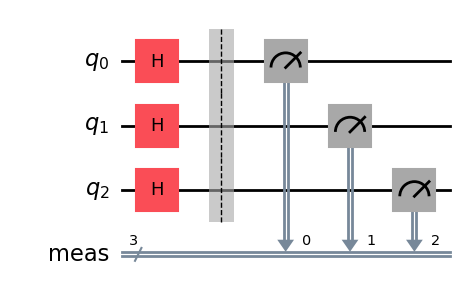

In [7]:
# set up a Quantum circuit with 3 qubits
qc = QuantumCircuit(3)

# place a Hadamard gate on qubits 0, 1, and 2
qc.h(0)
qc.h(1)
qc.h(2)

# add a measurement to your circuit
qc.measure_all()

# visualize your circuit before running it
qc.draw("mpl")

## Qiskit Patterns: Optimize for target hardware

In [8]:
# instantiate runtime service, choose backend

service = QiskitRuntimeService(channel="ibm_cloud")
backend = service.least_busy(simulator=False, operational=True)
backend.name

'ibm_torino'

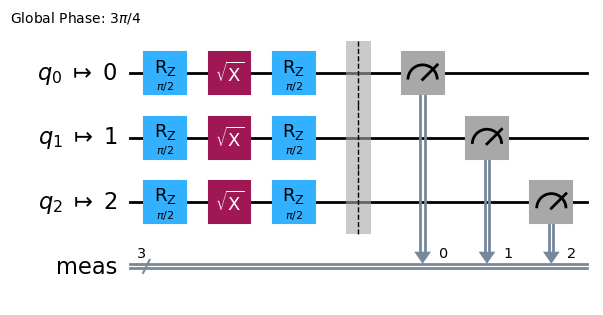

In [9]:
# transpile circuit

pm = generate_preset_pass_manager(backend=backend, optimization_level=1)
isa_circuit = pm.run(qc)

# visualize transpiled circuit

isa_circuit.draw('mpl', idle_wires=False)

## Qiskit Patterns: Execute on target hardware

In [20]:
# run job for desired number of shots

sampler = Sampler(mode=backend)
job = sampler.run([isa_circuit], shots=1024)
print(job.job_id())

d21uc04lir9s73aja3u0


## Qiskit Patterns: Post-process results
On the [IBM Quantum platform](https://quantum.ibm.com/), you should click into either your most recent job (if this is your most recent) or the job matching the ID that was output above if you had multiple jobs running. They will give you a piece of dynamic code within that workload readout that looks like the below but will autopopulate your API token and job ID when copy pasted.

In [21]:
from qiskit_ibm_runtime import QiskitRuntimeService

service = QiskitRuntimeService(
    channel='ibm_quantum_platform',
    instance='crn:v1:bluemix:public:quantum-computing:us-east:a/ef0da753252641ebaf9f116335edf1b9:13eb13c0-4351-49ea-ab25-3201ff1bdb30::'
)
job = service.job('d21uc04lir9s73aja3u0')
job_result = job.result()

# To get counts for a particular pub result, use
#
# pub_result = job_result[<idx>].data.<classical register>.get_counts()
#
# where <idx> is the index of the pub and <classical register> is the name of the classical register.
# You can use circuit.cregs to find the name of the classical registers.

In [22]:
# get results in the form of counts

counts = job_result[0].data.meas.get_counts()
print(counts)

{'111': 114, '110': 132, '001': 117, '100': 138, '010': 152, '000': 153, '101': 81, '011': 137}


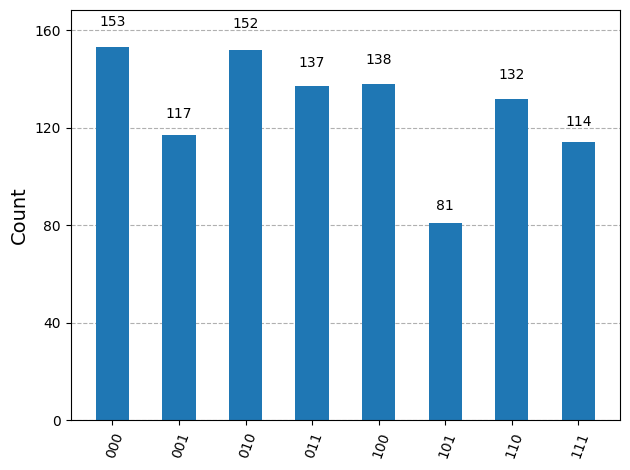

In [23]:
# plot results

plot_histogram(counts)

We have modeled what it would look like to get 1024 separate responses from our Magic 8 Ball. We could just run it again, one time, to get a response for a single question (you are welcome to do so). For the sake of time, however, I will just take the first sampled measurement as our answer. The bitstrings in our counts item are added in the order that they were measured, so they are still random.

In [24]:
# accessing the first key of the dict item containing our results
first_key = list(counts.keys())[0]

# turning that string into an integer
# result is given in base 2, so we need to communicate that because the int() function assumes base 10 as default
integer_value = int(first_key, 2)

# returns our Magic 8 Ball response
print(responses[integer_value])

Outlook not so good


### Expanding on the Magic 8 Ball

What if we could create a biased Magic 8 Ball, one that would increase the likelihood of measuring outcomes associated with positive or negative responses?

### Qiskit Patterns: Map problem to quantum circuits

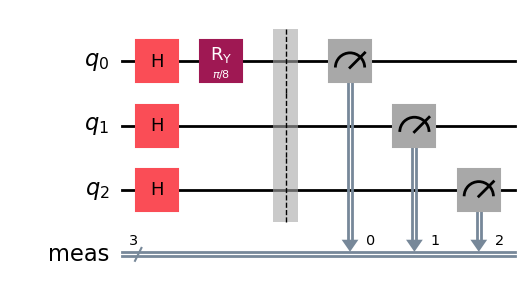

In [25]:
# set up a Quantum circuit with 3 qubits
qc_weighted = QuantumCircuit(3)

# place a Hadamard gate on qubits 0, 1, and 2
qc_weighted.h(0)
qc_weighted.h(1)
qc_weighted.h(2)

# weight the likelihood of certain outcomes by using an Ry gate
qc_weighted.ry(math.pi / 8, 0)

# add a measurement to your circuit
qc_weighted.measure_all()

# visualize the circuit before running it
qc_weighted.draw("mpl")

### Qiskit Patterns: Optimize for target hardware

In [27]:
# instantiate runtime service, choose backend

service = QiskitRuntimeService(channel="ibm_cloud")
backend = service.least_busy(simulator=False, operational=True)
backend.name

'ibm_torino'

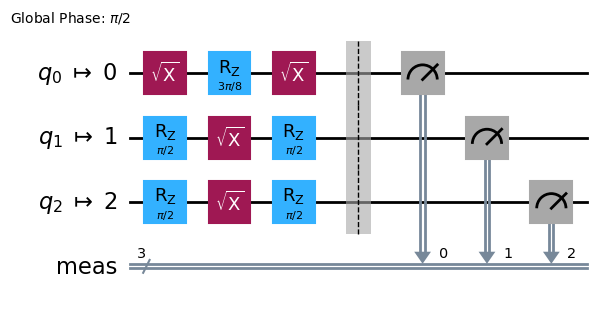

In [28]:
# transpile circuit

pm = generate_preset_pass_manager(backend=backend, optimization_level=1)
isa_circuit = pm.run(qc_weighted)

# visualize transpiled circuit

isa_circuit.draw('mpl', idle_wires=False)

### Qiskit Patterns: Execute on target hardware

In [29]:
# run job for desired number of shots

sampler = Sampler(mode=backend)
job = sampler.run([isa_circuit], shots=1024)
print(job.job_id())

d21ucm229d8c73de8kq0


### Qiskit Patterns: Post-process results

In [30]:
from qiskit_ibm_runtime import QiskitRuntimeService

service = QiskitRuntimeService(
    channel='ibm_quantum_platform',
    instance='crn:v1:bluemix:public:quantum-computing:us-east:a/ef0da753252641ebaf9f116335edf1b9:13eb13c0-4351-49ea-ab25-3201ff1bdb30::'
)
job = service.job('d21ucm229d8c73de8kq0')
job_result = job.result()

# To get counts for a particular pub result, use
#
# pub_result = job_result[<idx>].data.<classical register>.get_counts()
#
# where <idx> is the index of the pub and <classical register> is the name of the classical register.
# You can use circuit.cregs to find the name of the classical registers.

In [31]:
# get results in the form of counts

counts = job_result[0].data.meas.get_counts()
print(counts)

{'010': 101, '011': 179, '110': 89, '111': 149, '001': 173, '101': 138, '100': 94, '000': 101}


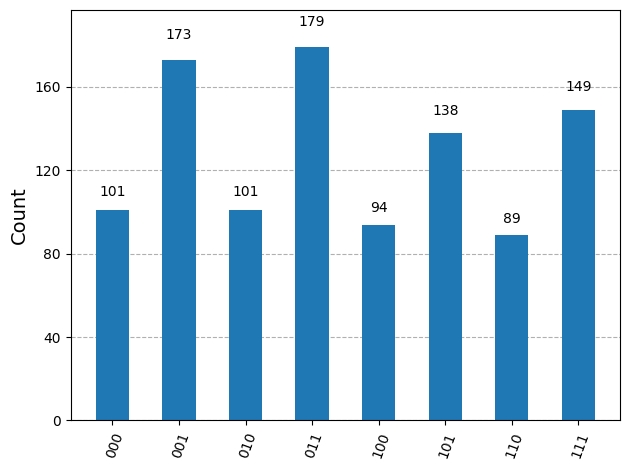

In [32]:
# plot results

plot_histogram(counts)

In [33]:
# accessing the first key of the dict item containing our results
first_key = list(counts.keys())[0]

# turning that string into an integer
# result is given in base 2, so we need to communicate that because the int() function assumes base 10 as default
integer_value = int(first_key, 2)

# returns our Magic 8 Ball response
print(responses[integer_value])

Definitely


### Developing your own program using the StatevectorSampler

Bell circuits are specific circuits which generate Bell states, or EPR pairs, a form of entangled and normalized basis vectors. In other words, they are the circuits we use to generate entangled states, a key ingredient in quantum computations.

There exist 4 different Bell states. You can learn about each from the [Basics of Quantum Information page.](https://learning.quantum.ibm.com/course/basics-of-quantum-information/multiple-systems#bell-states)

Your Task: please build a circuit that generates the  |𝜓−⟩  Bell state.


### Qiskit Patterns: Map problem to quantum circuits

In [ ]:
# Build a circuit to form a psi-minus Bell state
# Apply gates to the provided QuantumCircuit, qc

bell = QuantumCircuit(2)

bell.h(0)
bell.cx(0, 1)
bell.z(0)
bell.x(1)
bell.measure_all()

bell.draw("mpl")

### Qiskit Patterns: Optimize for target hardware

In [ ]:
# instantiate runtime service, choose backend

service = QiskitRuntimeService(channel="ibm_quantum")
backend = service.least_busy(simulator=False, operational=True)
backend.name

In [ ]:
# transpile circuit

pm = generate_preset_pass_manager(backend=backend, optimization_level=1)
isa_circuit = pm.run(bell)

# visualize transpiled circuit

isa_circuit.draw('mpl', idle_wires=False)

### Qiskit Patterns: Execute on target hardware

In [ ]:
# run job for desired number of shots

sampler = Sampler(mode=backend)
job = sampler.run([isa_circuit], shots=1024)
print(job.job_id())

### Qiskit Patterns: Post-process results

In [ ]:
from qiskit_ibm_runtime import QiskitRuntimeService

service = QiskitRuntimeService(
    channel='ibm_quantum',
    instance='ibm-q/open/main',
    token='***'
)
job = service.job('***')
job_result = job.result()

In [ ]:
# get results in the form of counts

counts = job_result[0].data.meas.get_counts()
print(counts)

In [ ]:
# plot results

plot_histogram(counts)

For an additional challenge, we will develop a slightly more complicated circuit. Similarly to Bell states circuit producing Bell states, W-state circuits produce W states. Although Bell states entangle two qubits, W-states entangle three qubits. We will provide some specifics of the operation for today. If you are interested in learning more about W-states, check out this [Wikipedia article.](https://en.wikipedia.org/wiki/W_state)

To build our W-state, we will follow 6 simple steps:
- Initialize our 3 qubit circuit
- Perform an Ry rotation on our qubit. The specifics of this operation are provided.
- Perform a controlled hadamard gate on qubit 1, with control qubit 0
- Add a CNOT gate with control qubit 1 and target qubit 2
- Add a CNOT gate with control qubit 0 and target qubit 1
- Add a X gate on qubit 0

### Qiskit Patterns: Map problem to quantum circuits

In [ ]:
# Let's create and draw a W-state circuit

wstate = QuantumCircuit(3)

wstate.ry(1.91063324, 0)

# below is filled in for purposes of testing the lab, on the day of we will have them fill this in themselves

wstate.ch(0, 1)
wstate.cx(1, 2)
wstate.cx(0, 1)
wstate.x(0)
wstate.measure_all()

wstate.draw("mpl")

### Qiskit Patterns: Optimize for target hardware

In [ ]:
# instantiate runtime service, choose backend

service = QiskitRuntimeService(channel="ibm_quantum")
backend = service.least_busy(simulator=False, operational=True)
backend.name

In [ ]:
# transpile circuit

pm = generate_preset_pass_manager(backend=backend, optimization_level=1)
isa_circuit = pm.run(wstate)

# visualize transpiled circuit

isa_circuit.draw('mpl', idle_wires=False)

### Qiskit Patterns: Execute on target hardware

In [ ]:
# run job for desired number of shots

sampler = Sampler(mode=backend)
job = sampler.run([isa_circuit], shots=1024)
print(job.job_id())

### Qiskit Patterns: Post-process results

In [ ]:
from qiskit_ibm_runtime import QiskitRuntimeService

service = QiskitRuntimeService(
    channel='ibm_quantum',
    instance='ibm-q/open/main',
    token='***'
)
job = service.job('***')
job_result = job.result()

In [ ]:
# get results in the form of counts

counts = job_result[0].data.meas.get_counts()
print(counts)

In [ ]:
# plot results

plot_histogram(counts)